## Face detection with OpenCv's Dnn

From a folder select images, crop them and apply face detection model. Try some parameters.  
Then save all images who contain faces into a new folder.

In [2]:
import cv2
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [3]:
folder = '' # select folder
name_out = '' # name for the new folder
path_rec = name_out # create new folder, where images will be saved
if not os.path.isdir(path_rec):
    os.mkdir(path_rec)

In [5]:
# prepare model, give path for theses files below

prototxt_path = "dnn/deploy.prototxt"
model_path = "dnn/res10_300x300_ssd_iter_140000_fp16.caffemodel"
model = cv2.dnn.readNetFromCaffe(prototxt_path, model_path) # load Caffe model

In [7]:
# apply Dnn classifier and save in a new folder

conf = []
filenames = os.listdir(folder)
for filename in tqdm(os.listdir(folder)):
    if filename.endswith('.jpg'):
        file_path = os.path.join(folder, filename)
        image = cv2.imread(file_path)
        h, w = image.shape[:2]
        blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0)) # resize and mean substraction
        model.setInput(blob) 
        output = np.squeeze(model.forward())
        for i in range(0, output.shape[0]):
            confidence = output[i, 2] # get the confidence
            conf.append(confidence)
            #Plot(x = conf)
            threshold = 0.7 # select confidence threshold
            if confidence > threshold: 
                result_path = os.path.join(path_rec, filename)
                cv2.imwrite(result_path, image)


100%|██████████| 51/51 [00:04<00:00, 10.63it/s]


In [8]:
# Get percentage of images classified (folders need to only have images)

a = (100 / int(len(os.listdir(folder)))) * int(len(os.listdir(path_rec)))
print(str(round(a, 2))+ "% of images may contain face(s) with threshold : " + str(threshold))

15.69% of images may contain face(s) with threshold : 0.7


In [20]:
# Confidence above 70%
conf07 = []
for i in conf:
    if i >= 0.7:
        conf07.append(i)

In [29]:
# plot and estimate confidence treshold

def Plot (x):
    
    fig, ax = plt.subplots()
    ax.hist(x, bins=100,color='b',alpha=0.8, histtype="barstacked", label = "Confidence")
    ax.set(xlabel='% of confidence', ylabel='Confidence per image',
            title='Confidence above 70%')
    plt.show()
    return fig

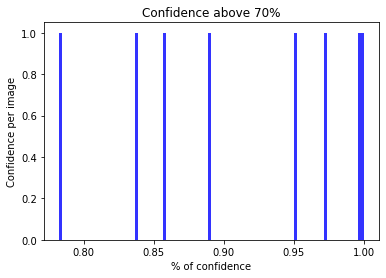

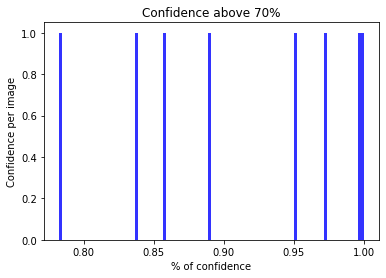

In [30]:
Plot(x = conf07)

In [ ]:
# Save informations

with open( name_out +'.txt', 'w') as b:
        b.write((str(round(a, 2))+ "% of images may contain face(s)"))
        
Plot(x = conf).savefig(name_out + ".svg")

In [11]:
## Variables informations

#TruePositives
tp = 7

#TrueNegatives
tn = 1

#FalseNegatives
fn = 24

#FalsePositives
fp = 18




In [12]:
# Accuracy

a = round(((tp + tn)/(tp + tn + fn + fp))*100, 2)
print(f"Accuracy is at {a} %")

Accuracy is at 16.0 %


In [13]:
# Recall

r = round((tp /(tp + fn))*100, 2)
print(f"Recall is at {r} %")

Recall is at 22.58 %


In [14]:
# Precision

p = round((tp /(tp + fp))*100, 2)
print(f"Precision is at {p} %")

Precision is at 28.0 %
